In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm



In [2]:
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
tqdm.pandas()

In [4]:
dir_root = '../data/chicago_IL/'
dir_images = '../data/chicago_IL/images'

csv_path = os.path.join(dir_root, 'df_chicago_IL_weather_merged.csv')
df_chicago = pd.read_csv(csv_path, parse_dates=True)

df_chicago['FlightDate'] = pd.to_datetime(df_chicago['FlightDate'], format='%Y-%m-%d')

# Create a target classification problem

In [5]:

df_chicago['is_delayed'] = df_chicago.progress_apply(lambda row: 1 if row['ArrDelayMinutes'] > 0 else 0, axis=1)

# df_chicago.to_csv(csv_path, index=False)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1710564/1710564 [00:40<00:00, 42140.25it/s]


In [6]:
# Create a target classification problem

def get_delay_class(delay_mins):
    delay_class = 'Not assigned'
    if delay_mins <= 0:
        delay_class = 'on_time'
    elif 0 < delay_mins <= 15:
        delay_class = 'delay_0_15_mins'
    elif 15 < delay_mins <= 45:
        delay_class = 'delay_15_45_mins'
    elif 45 < delay_mins <= 120:
        delay_class = 'delay_45_120_mins'
    else:
        delay_class = 'delay_gte_120_mins'
    return delay_class
        

df_chicago['delay_class'] = df_chicago.progress_apply(lambda row: get_delay_class(row['ArrDelayMinutes']), axis=1)

# df_chicago.to_csv(csv_path, index=False)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1710564/1710564 [00:48<00:00, 35398.65it/s]


# All columns of the dataset

In [9]:
list_all_columns = list(df_chicago.columns)

display(list_all_columns)

['FlightDate',
 'Airline',
 'Origin',
 'Dest',
 'Cancelled',
 'Diverted',
 'CRSDepTime',
 'DepTime',
 'DepDelayMinutes',
 'DepDelay',
 'ArrTime',
 'ArrDelayMinutes',
 'AirTime',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'Distance',
 'Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'Marketing_Airline_Network',
 'Operated_or_Branded_Code_Share_Partners',
 'DOT_ID_Marketing_Airline',
 'IATA_Code_Marketing_Airline',
 'Flight_Number_Marketing_Airline',
 'Operating_Airline',
 'DOT_ID_Operating_Airline',
 'IATA_Code_Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'OriginAirportID',
 'OriginAirportSeqID',
 'OriginCityMarketID',
 'OriginCityName',
 'OriginState',
 'OriginStateFips',
 'OriginStateName',
 'OriginWac',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRS

In [10]:
list_selected_features = [
 'FlightDate',
 'Airline',
 'Dest',
 'Cancelled',
 'Diverted',
 'CRSDepTime',
 'DepTime',
 'DepDelayMinutes',
 'DepDelay',
 'ArrTime',
 'ArrDelayMinutes',
 'AirTime',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'Distance',
 'Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'Marketing_Airline_Network',
 'Flight_Number_Marketing_Airline',
 'Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'DestAirportID',
 'DestAirportSeqID',
 'DestCityMarketID',
 'DestCityName',
 'DestState',
 'DestStateFips',
 'DestStateName',
 'DestWac',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrDelay',
 'ArrDel15',
 'ArrivalDelayGroups',
 'ArrTimeBlk',
 'DistanceGroup',
 'DivAirportLandings',
 'DATE',
 'PRCP',
 'PRCP_ATTRIBUTES',
 'SNOW',
 'SNOW_ATTRIBUTES',
 'SNWD',
 'SNWD_ATTRIBUTES',
 'TMAX',
 'TMAX_ATTRIBUTES',
 'TMIN',
 'TMIN_ATTRIBUTES',
 'AWND',
 'AWND_ATTRIBUTES',
 'TAVG',
 'TAVG_ATTRIBUTES',
 'WDF2',
 'WDF2_ATTRIBUTES',
 'WDF5',
 'WDF5_ATTRIBUTES',
 'WSF2',
 'WSF2_ATTRIBUTES',
 'WSF5',
 'WSF5_ATTRIBUTES',
 'is_delayed',
 'delay_class'
]

df_chicago = df_chicago[list_selected_features].copy()

# Min and max date and total data days

In [7]:
min_date = min(df_chicago['FlightDate'])
max_date = max(df_chicago['FlightDate'])

diff = max_date - min_date

print(f"min_date: {min_date}, max_date: {max_date} \ndiff: {diff}")
display(diff)

min_date: 2018-01-01 00:00:00, max_date: 2022-07-31 00:00:00 
diff: 1672 days 00:00:00


Timedelta('1672 days 00:00:00')

# Plot quarterly delayed flights

In [17]:
dict_counts = dict(df_chicago['Year'].value_counts())
# dict_counts = sorted(dict_counts)

dict_counts

{2019: 485800, 2018: 374443, 2021: 350085, 2020: 286749, 2022: 213487}

In [37]:
def plot_quarterly_delayed_flights(df_x, col, debug=False, do_sum=False):
    list_data = []
    for year in range(2018, 2023):
        df_year = df_x[df_x['Year'] == year]
        dict_year = {}
        for quarter in range(1, 5, 1):
            cond_quarter = df_year['Quarter'] == quarter
            df_quarter = df_year[cond_quarter]

            dict_stats = dict(df_quarter[col].value_counts())
            dict_year[quarter] = dict_stats

        list_data.append((year, dict_year))
    
    if debug:
        display(list_data)
    combined_df = pd.concat({key: pd.DataFrame(val) for key, val in list_data}).stack()
    combined_df.index.names = ['year', col, 'quarter']
    combined_df = combined_df.unstack([col])
    if do_sum:
        combined_df['total_flights'] = combined_df.sum(axis=1)
    
    if debug:
        display(combined_df)

    # combined_df.plot.bar(stacked=True)
    combined_df.plot.bar()
    

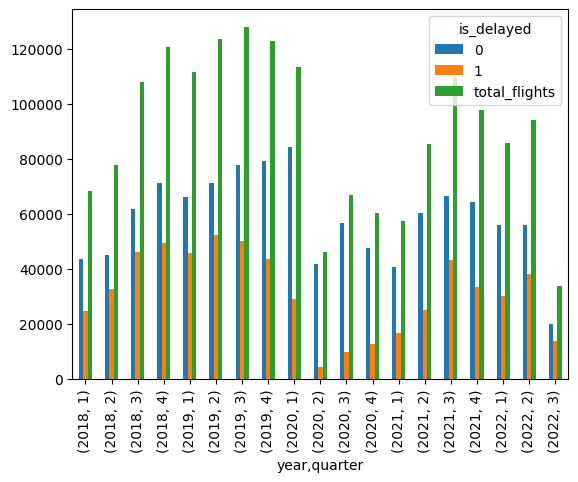

In [35]:

plot_quarterly_delayed_flights(df_chicago, 'is_delayed', do_sum=True)

In [38]:
def plot_quarterly_only_delayed_flights(df_x, col, debug=False, do_sum=False):
    df_delayed = df_x[df_x['is_delayed'] == 1]
    list_data = []
    for year in range(2018, 2023):
        df_year = df_delayed[df_delayed['Year'] == year]
        dict_year = {}
        for quarter in range(1, 5, 1):
            cond_quarter = df_year['Quarter'] == quarter
            df_quarter = df_year[cond_quarter]

            dict_stats = dict(df_quarter[col].value_counts())
            dict_year[quarter] = dict_stats

        list_data.append((year, dict_year))
    
    if debug:
        display(list_data)
    combined_df = pd.concat({key: pd.DataFrame(val) for key, val in list_data}).stack()
    combined_df.index.names = ['year', col, 'quarter']
    combined_df = combined_df.unstack([col])
    if do_sum:
        combined_df['total_flights'] = combined_df.sum(axis=1)
    
    if debug:
        display(combined_df)

    # combined_df.plot.bar(stacked=True)
    combined_df.plot.bar()
    

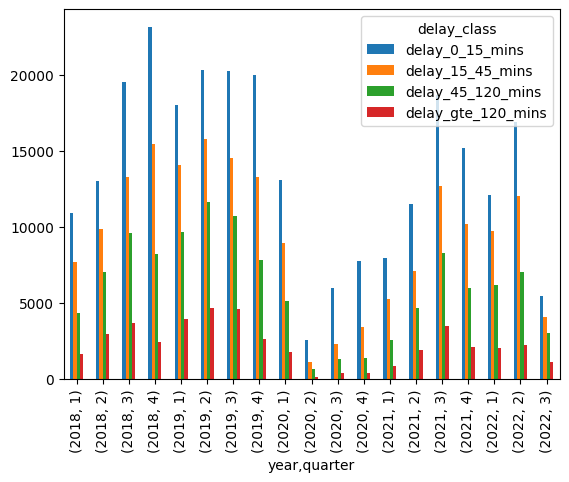

In [39]:

plot_quarterly_only_delayed_flights(df_chicago, 'delay_class')

# Plot cancelled flights

In [62]:
def plot_quarterly_cancelled_flights(df_x, col, debug=False, do_sum=False, max_val = 12500):
    list_data = []
    for year in range(2018, 2023):
        df_year = df_x[df_x['Year'] == year]
        dict_year = {}
        for quarter in range(1, 5, 1):
            cond_quarter = df_year['Quarter'] == quarter
            df_quarter = df_year[cond_quarter]

            dict_stats = dict(df_quarter[col].value_counts())
            if debug:
                print(dict_stats)
            
            # Capping max_value
            dict_stats[0] = min(max_val, dict_stats.get(0, 0))
            
            dict_year[quarter] = dict_stats

        list_data.append((year, dict_year))
    
    if debug:
        display(list_data)
    combined_df = pd.concat({key: pd.DataFrame(val) for key, val in list_data}).stack()
    combined_df.index.names = ['year', col, 'quarter']
    combined_df = combined_df.unstack([col])
    if do_sum:
        combined_df['total_flights'] = combined_df.sum(axis=1)
    
    if debug:
        display(combined_df)

    # combined_df.plot.bar(stacked=True)
    combined_df.plot.bar()
    

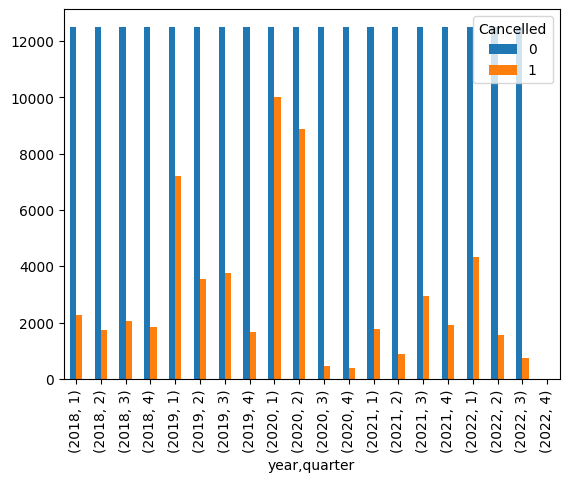

In [63]:

plot_quarterly_cancelled_flights(df_chicago, 'Cancelled', max_val=12500)

# Diverted Flights

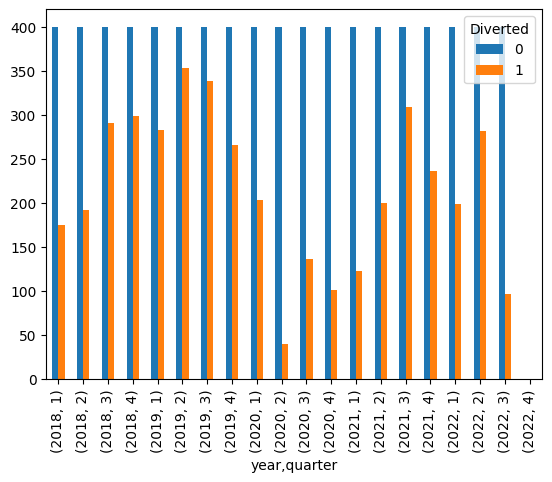

In [65]:

plot_quarterly_cancelled_flights(df_chicago, 'Diverted', max_val=400)

# Top N cities 

In [71]:

def get_top_n_cities(df_x, n_cities, debug=True):
    df_city = df_x.groupby(['DestCityName']).size().reset_index().rename(columns={0: 'count'})
    df_city = df_city.sort_values(by='count', ascending=False)
    
    if debug:
        display(df_city.head(n_cities).reset_index())
        
    return list(df_city.head(n_cities)['DestCityName'])
    


In [72]:
num_cities = 10
list_top_cities = get_top_n_cities(df_chicago, num_cities)

,index,DestCityName,count
0,132,"New York, NY",61840
1,195,"Washington, DC",43763
2,8,"Atlanta, GA",41844
3,47,"Denver, CO",38857
4,121,"Minneapolis, MN",38732
5,109,"Los Angeles, CA",35102
6,49,"Detroit, MI",32984
7,147,"Phoenix, AZ",31633
8,19,"Boston, MA",31365
9,103,"Las Vegas, NV",31364


In [87]:
def plot_top_city_flights(df_x, list_cities, col, debug=False, do_sum=False, max_val=5000, diverted_only=True):
    if diverted_only:
        df_delayed = df_x[df_x['is_delayed'] == 1]
        
    list_data = []
    for city in list_cities:
        df_city = df_x[df_x['DestCityName'] == city]
        dict_city = {}
        
        for year in range(2018, 2023, 1):
            df_year = df_city[df_city['Year'] == year]

            dict_stats = dict(df_year[col].value_counts())
            if debug:
                print(dict_stats)
            
            # Capping max_value
            dict_stats['on_time'] = min(max_val, dict_stats.get('on_time', 0))
            
            dict_city[year] = dict_stats

        list_data.append((city, dict_city))
    
    if debug:
        display(list_data)
        
    combined_df = pd.concat({key: pd.DataFrame(val) for key, val in list_data}).stack()
    combined_df.index.names = ['city', col, 'year']
    combined_df = combined_df.unstack([col])
    
    if do_sum:
        combined_df['total_flights'] = combined_df.sum(axis=1)
    
    if debug:
        display(combined_df)
    
    fig, axes = plt.subplots(1,1, figsize=(10, 5))
    # combined_df.plot.bar(stacked=True)
    combined_df.plot.bar(ax=axes)
    

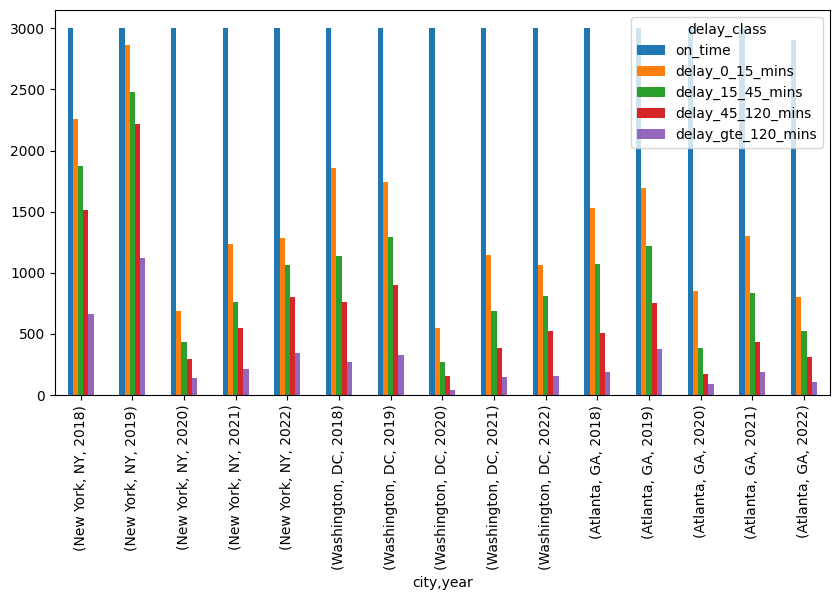

In [89]:

num_cities = 3
list_top_cities = get_top_n_cities(df_chicago, num_cities, debug=False)
plot_top_city_flights(df_chicago, list_top_cities, 'delay_class', max_val=3000)

# Analyze the NY data

In [92]:
dest_city = 'New York, NY'

df_dest_city = df_chicago[df_chicago['DestCityName'] == dest_city]



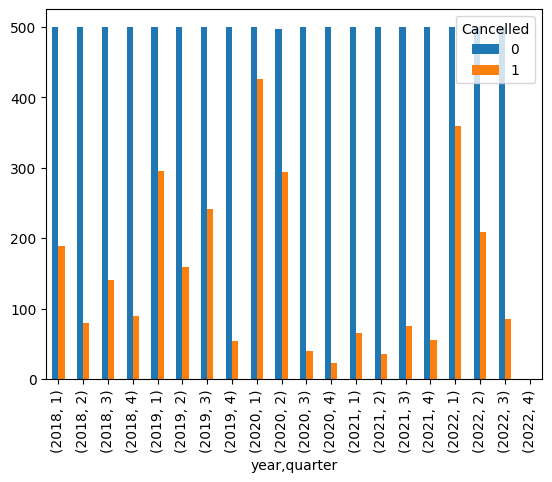

In [94]:

plot_quarterly_cancelled_flights(df_dest_city, 'Cancelled', max_val=500)

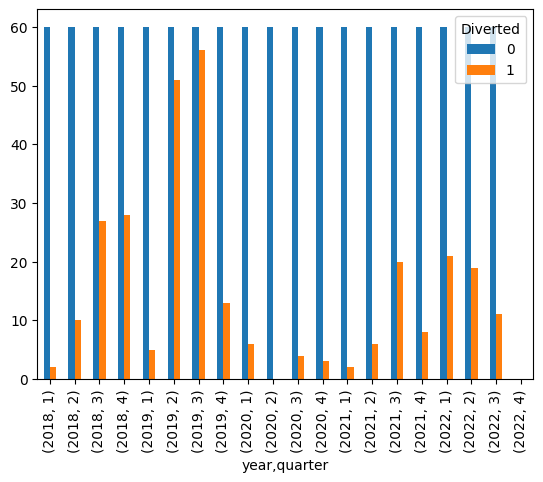

In [101]:

plot_quarterly_cancelled_flights(df_dest_city, 'Diverted', max_val=60)

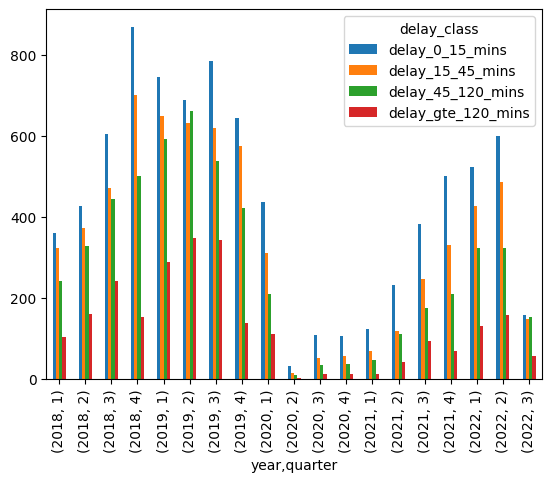

In [97]:

plot_quarterly_only_delayed_flights(df_dest_city, 'delay_class')

# Save city data

In [104]:
list_city_cols = [
 'FlightDate',
 'Airline',
 'Cancelled',
 'Diverted',
 'CRSDepTime',
 'DepTime',
 'DepDelayMinutes',
 'DepDelay',
 'ArrTime',
 'ArrDelayMinutes',
 'AirTime',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'Distance',
 'Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'Marketing_Airline_Network',
 'Flight_Number_Marketing_Airline',
 'Operating_Airline',
 'Tail_Number',
 'Flight_Number_Operating_Airline',
 'DepDel15',
 'DepartureDelayGroups',
 'DepTimeBlk',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrDelay',
 'ArrDel15',
 'ArrivalDelayGroups',
 'ArrTimeBlk',
 'DistanceGroup',
 'DivAirportLandings',
 'DATE',
 'PRCP',
 'PRCP_ATTRIBUTES',
 'SNOW',
 'SNOW_ATTRIBUTES',
 'SNWD',
 'SNWD_ATTRIBUTES',
 'TMAX',
 'TMAX_ATTRIBUTES',
 'TMIN',
 'TMIN_ATTRIBUTES',
 'AWND',
 'AWND_ATTRIBUTES',
 'TAVG',
 'TAVG_ATTRIBUTES',
 'WDF2',
 'WDF2_ATTRIBUTES',
 'WDF5',
 'WDF5_ATTRIBUTES',
 'WSF2',
 'WSF2_ATTRIBUTES',
 'WSF5',
 'WSF5_ATTRIBUTES',
 'is_delayed',
 'delay_class'
]

df_dest_city = df_dest_city[list_city_cols]

dest_city_csv_path = os.path.join(dir_root, f'df_chicago_IL_{dest_city}.csv')

df_dest_city.to_csv(dest_city_csv_path, index=False)

# Count Fleet data

In [120]:
def plot_fleet(df_x, list_cities, debug=False, do_sum=False, max_val=5000, diverted_only=True):
    if diverted_only:
        df_delayed = df_x[df_x['is_delayed'] == 1]
        
    list_data = []
    list_airlines = list(df_x['Airline'].unique())
    
    for city in list_cities:
        df_city = df_x[df_x['DestCityName'] == city]
        dict_city = {}
        
        for airline in list_airlines:
            df_airline = df_city[df_city['Airline'] == airline]
            dict_stats = {}
            
            dict_stats['uniq_tail_nums'] = len(list(df_airline['Tail_Number'].unique()))
            dict_stats['uniq_mkt_nums'] = len(list(df_airline['Flight_Number_Marketing_Airline'].unique()))

            if debug:
                print(dict_stats)

                # Capping max_value
                # dict_stats['on_time'] = min(max_val, dict_stats.get('on_time', 0))
            
            if dict_stats['uniq_tail_nums'] > 100:
                dict_city[airline] = dict_stats

        list_data.append((city, dict_city))
    
    if debug:
        display(list_data)
        
    combined_df = pd.concat({key: pd.DataFrame(val) for key, val in list_data}).stack()
    combined_df.index.names = ['city', 'stats', 'airline']
    combined_df = combined_df.unstack(['stats'])
    
    if do_sum:
        combined_df['total_flights'] = combined_df.sum(axis=1)
    
    if debug:
        display(combined_df)
    
    fig, axes = plt.subplots(1,1, figsize=(10, 5))
    # combined_df.plot.bar(stacked=True)
    combined_df.plot.bar(ax=axes)
    

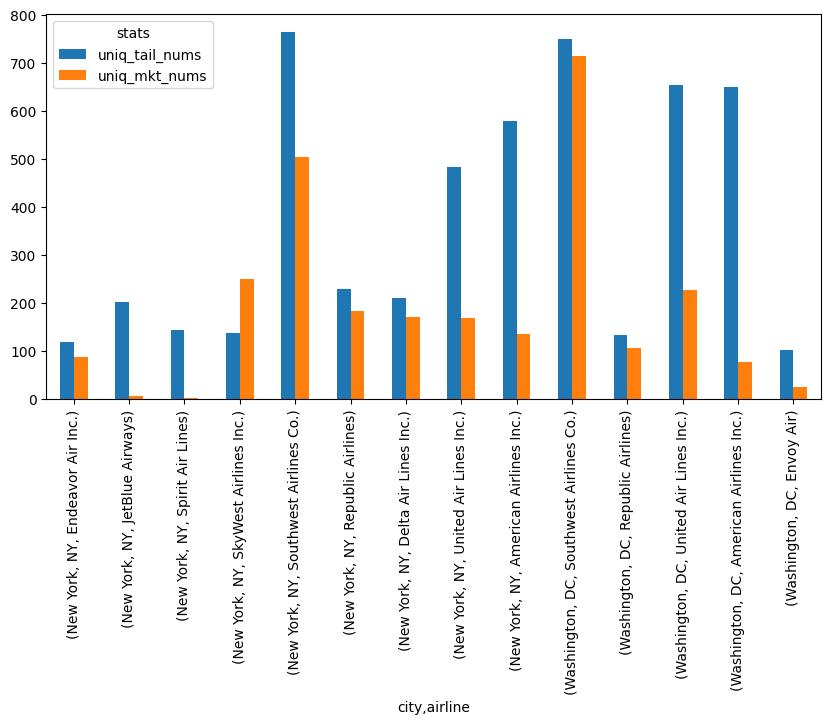

In [121]:
plot_fleet(df_chicago, list_top_cities[:2])

# City Diverted versus Delays

In [103]:
df_diverted = df_dest_city[df_dest_city['Diverted'] == 1]

df_diverted = df_diverted[list_div_cols]

df_div_delayed

,FlightDate,Airline,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Flight_Number_Marketing_Airline,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DestState,DestStateFips,DestStateName,DestWac,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,DATE,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,AWND,AWND_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,WDF2,WDF2_ATTRIBUTES,WDF5,WDF5_ATTRIBUTES,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,is_delayed,delay_class
25430,2018-10-09,United Air Lines Inc.,LGA,0,1,2021,2257.0,156,156.0,NaN,0,NaN,129.0,NaN,733.0,2018,4,10,9,2,UA,2422,UA,N26226,2422,12953,1295304,31703,"New York, NY",NY,36,New York,22,1.0,10.0,2000-2059,12.0,2309.0,NaN,NaN,2330,NaN,NaN,NaN,2300-2359,3,1.0,2018-10-09,3.0,",,W,2400",0.0,",,W",0.0,",,W,2400",294.0,",,W",211.0,",,W",46.0,",,W",246.0,"H,,S",160.0,",,W",200.0,",,W",94.0,",,W",130.0,",,W",0,on_time
36792,2018-10-07,United Air Lines Inc.,LGA,0,1,2021,2133.0,72,72.0,NaN,0,NaN,129.0,NaN,733.0,2018,4,10,7,7,UA,2422,UA,N13227,2422,12953,1295304,31703,"New York, NY",NY,36,New York,22,1.0,4.0,2000-2059,122.0,2335.0,NaN,NaN,2330,NaN,NaN,NaN,2300-2359,3,1.0,2018-10-07,132.0,",,W,2400",0.0,",,W",0.0,",,W,2400",172.0,",,W",139.0,",,W",47.0,",,W",144.0,"H,,S",30.0,",,W",40.0,",,W",76.0,",,W",98.0,",,W",0,on_time
45672,2018-10-02,Delta Air Lines Inc.,LGA,0,1,1930,1924.0,0,-6.0,1420.0,0,NaN,139.0,NaN,733.0,2018,4,10,2,2,DL,2338,DL,N945AT,2338,12953,1295304,31703,"New York, NY",NY,36,New York,22,0.0,-1.0,1900-1959,28.0,1952.0,1416.0,4.0,2249,NaN,NaN,NaN,2200-2259,3,1.0,2018-10-02,3.0,",,W,2400",0.0,",,W",0.0,",,W,2400",194.0,",,W",144.0,",,W",23.0,",,W",167.0,"H,,S",300.0,",,W",290.0,",,W",67.0,",,W",94.0,",,W",0,on_time
46648,2018-10-02,Spirit Air Lines,LGA,0,1,1743,1830.0,47,47.0,NaN,0,NaN,137.0,NaN,733.0,2018,4,10,2,2,NK,630,NK,N668NK,630,12953,1295304,31703,"New York, NY",NY,36,New York,22,1.0,3.0,1700-1759,35.0,1905.0,NaN,NaN,2100,NaN,NaN,NaN,2100-2159,3,1.0,2018-10-02,3.0,",,W,2400",0.0,",,W",0.0,",,W,2400",194.0,",,W",144.0,",,W",23.0,",,W",167.0,"H,,S",300.0,",,W",290.0,",,W",67.0,",,W",94.0,",,W",0,on_time
52847,2018-10-02,United Air Lines Inc.,LGA,0,1,1900,1855.0,0,-5.0,230.0,0,NaN,131.0,NaN,733.0,2018,4,10,2,2,UA,1823,UA,N27722,1823,12953,1295304,31703,"New York, NY",NY,36,New York,22,0.0,-1.0,1900-1959,31.0,1926.0,226.0,4.0,2211,NaN,NaN,NaN,2200-2259,3,1.0,2018-10-02,3.0,",,W,2400",0.0,",,W",0.0,",,W,2400",194.0,",,W",144.0,",,W",23.0,",,W",167.0,"H,,S",300.0,",,W",290.0,",,W",67.0,",,W",94.0,",,W",0,on_time
62261,2018-10-05,American Airlines Inc.,LGA,0,1,2030,2129.0,59,59.0,NaN,0,NaN,130.0,NaN,733.0,2018,4,10,5,5,AA,357,AA,N952NN,357,12953,1295304,31703,"New York, NY",NY,36,New York,22,1.0,3.0,2000-2059,27.0,2156.0,NaN,NaN,2340,NaN,NaN,NaN,2300-2359,3,1.0,2018-10-05,315.0,",,W,2400",0.0,",,W",0.0,",,W,2400",183.0,",,W",122.0,",,W",32.0,",,W",141.0,"H,,S",130.0,",,W",120.0,",,W",72.0,",,W",98.0,",,W",0,on_time
62263,2018-10-07,American Airlines Inc.,LGA,0,1,2030,2123.0,53,53.0,NaN,0,NaN,130.0,NaN,733.0,2018,4,10,7,7,AA,357,AA,N824NN,357,12953,1295304,31703,"New York, NY",NY,36,New York,22,1.0,3.0,2000-2059,119.0,2322.0,NaN,NaN,2340,NaN,NaN,NaN,2300-2359,3,1.0,2018-10-07,132.0,",,W,2400",0.0,",,W",0.0,",,W,2400",172.0,",,W",139.0,",,W",47.0,",,W",144.0,"H,,S",30.0,",,W",40.0,",,W",76.0,",,W",98.0,",,W",0,on_time
65144,2018-10-02,SkyWest Airlines Inc.,LGA,0,1,1730,1722.0,0,-8.0,NaN,0,NaN,128.0,NaN,733.0,2018,4,10,2,2,DL,3652,OO,N273SY,3652,12953,1295304,31703,"New York, NY",NY,36,New York,22,0.0,-1.0,1700-1759,17.0,1739.0,NaN,NaN,2038,NaN,NaN,NaN,2000-2059,3,1.0,2018-10-02,3.0,",,W,

In [23]:

def get_dest_city_stats(df_x, airline, dest_city):
    cond_airline = df_x['Airline'].isin(airline)
    cond_dest_city = df_x['DestCityName'].isin(dest_city)
    
    cond_combined = cond_airline & cond_dest_city
    
    df_temp = df_x[cond_combined].copy()
    
    return df_temp

In [24]:
airline_x = list(df_chicago['Airline'].unique())
dest_city_x = ['New York, NY']


df_dest_newyork = get_dest_city_stats(df_chicago, airline_x, dest_city_x)
df_dest_newyork

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,DestAirportID,DestCityName,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings,PRCP,SNOW,SNWD,TMAX,TMIN,AWND,TAVG,WDF2,WDF5,WSF2,WSF5,is_delayed
286,2018-03-17,Southwest Airlines Co.,MDW,LGA,0,0,745,752.0,7,7.0,1044.0,0,95.0,125.0,112.0,725,12953,"New York, NY",0.0,0.0,0700-0759,11.0,803.0,1038.0,6.0,1050,-6.0,0.0,-1.0,1000-1059,3,0,0,0,0,78,-10,45,29,40,50.0,89,107.0,0
287,2018-03-24,Southwest Airlines Co.,MDW,LGA,0,0,745,743.0,0,-2.0,1034.0,0,94.0,125.0,111.0,725,12953,"New York, NY",0.0,-1.0,0700-0759,9.0,752.0,1026.0,8.0,1050,-16.0,0.0,-2.0,1000-1059,3,0,0,0,0,44,0,78,20,90,90.0,125,170.0,0
288,2018-03-31,Southwest Airlines Co.,MDW,LGA,0,0,745,743.0,0,-2.0,1030.0,0,92.0,125.0,107.0,725,12953,"New York, NY",0.0,-1.0,0700-0759,11.0,754.0,1026.0,4.0,1050,-20.0,0.0,-2.0,1000-1059,3,0,23,0,0,144,0,71,67,210,210.0,134,179.0,0
586,2018-08-18,Southwest Airlines Co.,MDW,LGA,0,0,2005,2016.0,11,11.0,2304.0,0,91.0,125.0,108.0,725,12953,"New York, NY",0.0,0.0,2000-2059,10.0,2026.0,2257.0,7.0,2310,-6.0,0.0,-1.0,2300-2359,3,0,0,0,0,267,211,38,241,30,20.0,72,89.0,0
587,2018-08-11,Southwest Airlines Co.,MDW,LGA,0,0,2005,2026.0,21,21.0,2321.0,11,97.0,125.0,115.0,725,12953,"New York, NY",1.0,1.0,2000-2059,14.0,2040.0,2317.0,4.0,2310,11.0,0.0,0.0,2300-2359,3,0,0,0,0,311,200,21,249,20,30.0,94,103.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047670,2019-10-29,American Airlines Inc.,ORD,JFK,0,0,1144,1153.0,9,9.0,1447.0,0,94.0,135.0,114.0,740,12478,"New York, NY",0.0,0.0,1100-1159,12.0,1205.0,1439.0,8.0,1459,-12.0,0.0,-1.0,1400-1459,3,0,38,0,0,72,17,37,46,350,340.0,107,139.0,0
1047671,2019-10-30,American Airlines Inc.,ORD,JFK,0,0,1144,1221.0,37,37.0,1537.0,38,97.0,135.0,136.0,740,12478,"New York, NY",1.0,2.0,1100-1159,24.0,1245.0,1522.0,15.0,1459,38.0,1.0,2.0,1400-1459,3,0,157,30,30,50,0,55,25,10,20.0,103,130.0,1
1047672,2019-10-31,American Airlines Inc.,ORD,JFK,0,0,1144,1153.0,9,9.0,1601.0,62,107.0,135.0,188.0,740,12478,"New York, NY",0.0,0.0,1100-1159,72.0,1305.0,1552.0,9.0,1459,62.0,1.0,4.0,1400-1459,3,0,79,86,0,6,-38,67,8,310,310.0,112,152.0,1
1047707,2019-11-01,American Airlines Inc.,ORD,JFK,0,0,1144,1144.0,0,0.0,1444.0,0,102.0,135.0,120.0,740,12478,"New York, NY",0.0,0.0,1100-1159,10.0,1154.0,1436.0,8.0,1459,-15.0,0.0,-1.0,1400-1459,3,0,3,0,50,67,-49,43,-6,200,280.0,89,130.0,0


In [25]:
list_id_cols = ['FlightDate', 'Airline']

dict_agg = {
    "Cancelled": ['sum'], 
    "Diverted": ['sum'],
    "ArrDelayMinutes": ['sum'], 
    "is_delayed": ['count','sum']
}

list_sort_columns = [
    'FlightDate'
]

df_stats = df_dest_newyork.groupby(list_id_cols).agg(dict_agg).reset_index()
df_stats = df_stats.sort_values(by=list_sort_columns, ascending=[True for col in list_sort_columns])



In [26]:
df_stats

FlightDate                 Airline Cancelled Diverted ArrDelayMinutes  \
                                              sum      sum             sum   
0    2018-01-01       Endeavor Air Inc.         0        0              27   
1    2018-01-01         JetBlue Airways         0        0             107   
2    2018-01-01       Republic Airlines         0        0              64   
3    2018-01-01   SkyWest Airlines Inc.         0        0             354   
4    2018-01-01  Southwest Airlines Co.         0        0             662   
...         ...                     ...       ...      ...             ...   
7147 2022-07-31       Endeavor Air Inc.         0        0               8   
7148 2022-07-31         JetBlue Airways         0        0               0   
7149 2022-07-31       Republic Airlines         0        0              29   
7150 2022-07-31   SkyWest Airlines Inc.         0        0              59   
7152 2022-07-31   United Air Lines Inc.         0        0               0   

     is_delayed      
          count sum  
0             3   1  
1             2   1  
2             6   3  
3             5   3  
4             6   6  
...         ...  ..  
7147          3   1  
7148          2   0  
7149          1   1  
7150          3   1  
7152          8   0  

[7153 rows x 7 columns]

In [27]:
df_ts = df_stats.set_index('FlightDate')
df_ts

Airline Cancelled Diverted ArrDelayMinutes  \
                                         sum      sum             sum   
FlightDate                                                              
2018-01-01       Endeavor Air Inc.         0        0              27   
2018-01-01         JetBlue Airways         0        0             107   
2018-01-01       Republic Airlines         0        0              64   
2018-01-01   SkyWest Airlines Inc.         0        0             354   
2018-01-01  Southwest Airlines Co.         0        0             662   
...                            ...       ...      ...             ...   
2022-07-31       Endeavor Air Inc.         0        0               8   
2022-07-31         JetBlue Airways         0        0               0   
2022-07-31       Republic Airlines         0        0              29   
2022-07-31   SkyWest Airlines Inc.         0        0              59   
2022-07-31   United Air Lines Inc.         0        0               0   

           is_delayed      
                count sum  
FlightDate                 
2018-01-01          3   1  
2018-01-01          2   1  
2018-01-01          6   3  
2018-01-01          5   3  
2018-01-01          6   6  
...               ...  ..  
2022-07-31          3   1  
2022-07-31          2   0  
2022-07-31          1   1  
2022-07-31          3   1  
2022-07-31          8   0  

[7153 rows x 6 columns]